# Training a multilayer perceptron 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Import tf, keras, layers, models, optimizers, and datasets to build our own mlp
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, utils, datasets

#### Define the classes

In [2]:
NUM_CLASSES = 10

#### Prepare data

In [3]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()
# In this case, the x values are the pixel values out of 255

In [4]:
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

#  convert classes into one-hot encoded vectors
y_train = utils.to_categorical(y_train, NUM_CLASSES)
y_test = utils.to_categorical(y_test, NUM_CLASSES)

In [5]:
print(x_train[:1])
print(x_test[:1])

[[[[0.23137255 0.24313726 0.24705882]
   [0.16862746 0.18039216 0.1764706 ]
   [0.19607843 0.1882353  0.16862746]
   ...
   [0.61960787 0.5176471  0.42352942]
   [0.59607846 0.49019608 0.4       ]
   [0.5803922  0.4862745  0.40392157]]

  [[0.0627451  0.07843138 0.07843138]
   [0.         0.         0.        ]
   [0.07058824 0.03137255 0.        ]
   ...
   [0.48235294 0.34509805 0.21568628]
   [0.46666667 0.3254902  0.19607843]
   [0.47843137 0.34117648 0.22352941]]

  [[0.09803922 0.09411765 0.08235294]
   [0.0627451  0.02745098 0.        ]
   [0.19215687 0.10588235 0.03137255]
   ...
   [0.4627451  0.32941177 0.19607843]
   [0.47058824 0.32941177 0.19607843]
   [0.42745098 0.28627452 0.16470589]]

  ...

  [[0.8156863  0.6666667  0.3764706 ]
   [0.7882353  0.6        0.13333334]
   [0.7764706  0.6313726  0.10196079]
   ...
   [0.627451   0.52156866 0.27450982]
   [0.21960784 0.12156863 0.02745098]
   [0.20784314 0.13333334 0.07843138]]

  [[0.7058824  0.54509807 0.3764706 ]
   [0.6

#### Build the model

In [7]:
# The Input layer defines the input shape of the data. 
# images of height 32, width 32, and 3 color channels (RGB).
input_layer = layers.Input((32, 32, 3))

# reshapes the input data into a 1D array before feeding it into the subsequent fully connected layers.
x = layers.Flatten()(input_layer)

# Two Dense layers follow the Flatten layer, with 200 and 150 neurons, respectively. 
x = layers.Dense(200, activation="relu")(x) # Params 32 x 32 x 3 x 200 + 200
x = layers.Dense(150, activation="relu")(x) # Params = 200 x 150 + 150

# Final dense layer
# Serves as the output layer, consisting of NUM_CLASSES neurons and utilizes the softmax activation function
# The softmax activation normalizes the output into a probability distribution across the classes

output_layer = layers.Dense(NUM_CLASSES, activation="softmax")(x)

# The models.Model() function combines the defined layers into a functional Model.
model = models.Model(input_layer, output_layer) # Params = 150 * 10 + 10

#  provides a summary of the model architecture
model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 200)               614600    
                                                                 
 dense_1 (Dense)             (None, 150)               30150     
                                                                 
 dense_2 (Dense)             (None, 10)                1510      
                                                                 
Total params: 646260 (2.47 MB)
Trainable params: 646260 (2.47 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#### Train the model

In [15]:
# Optimize the model using Adam optimizer with learning rate of 0.0005
opt = optimizers.Adam(learning_rate=0.0005)

# Compile the model choosing crossentropy as loss function and accuracy as metric

model.compile(
    loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"]
)

In [18]:
model.fit(x_train, y_train, batch_size=32, epochs=10, shuffle=True)

Epoch 1/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.8424 - accuracy: 0.3379
Epoch 2/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.6599 - accuracy: 0.4066
Epoch 3/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.5788 - accuracy: 0.4349
Epoch 4/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.5328 - accuracy: 0.4531
Epoch 5/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.4966 - accuracy: 0.4672
Epoch 6/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.4624 - accuracy: 0.4790
Epoch 7/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.4381 - accuracy: 0.4864
Epoch 8/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.4099 - accuracy: 0.4965
Epoch 9/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.3921 - accuracy: 0.5045
Epoch 10/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.369

#### Evaluate the model

In [19]:
#  to evaluate the performance of a trained model on a test dataset
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.4786 - accuracy: 0.4781


[1.4786319732666016, 0.4781000018119812]

In [21]:
#  post-processing predictions into human-readable class labels
CLASSES = np.array(
    [
        "airplane",
        "automobile",
        "bird",
        "cat",
        "deer",
        "dog",
        "frog",
        "horse",
        "ship",
        "truck",
    ]
)

# predict class probabilities for the test dataset (x_test).
preds = model.predict(x_test)
# finds the index of the maximum predicted probability along the last axis of the preds array
preds_single = CLASSES[np.argmax(preds, axis=-1)]
#  maps the actual class indices to their corresponding class labels in the CLASSES array
actual_single = CLASSES[np.argmax(y_test, axis=-1)]

313/313 [==============================] - 1s 3ms/step


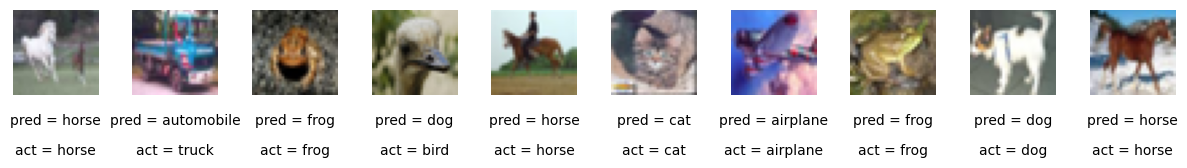

In [23]:
#  Select Random Indices from x_test:
n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

# Create and Configure the Figure:
fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

# Display Images with Predicted and Actual Labels:
for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i + 1)
    ax.axis("off")
    ax.text(
        0.5,
        -0.35,
        "pred = " + str(preds_single[idx]),
        fontsize=10,
        ha="center",
        transform=ax.transAxes,
    )
    ax.text(
        0.5,
        -0.7,
        "act = " + str(actual_single[idx]),
        fontsize=10,
        ha="center",
        transform=ax.transAxes,
    )
    ax.imshow(img)

#### That's it. Thank you!! 